<a href="https://colab.research.google.com/github/alexandertaoadams/AlexanderAdamsMastersThesis/blob/main/Complexity_Dimension.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gpjax

In [ ]:
import jax
import gpjax
import jax.numpy as jnp
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!git clone https://github.com/alexandertaoadams/AlexanderAdamsMastersThesis.git

import sys
sys.path.insert(0, '/content/AlexanderAdamsMastersThesis')
import AlexanderAdamsMastersThesis.src as src

from src.algorithms import Gram_XX_jit

## **Timing Test**

In [ ]:
# Approximation of 1 second long Brownian Motion
def brownian_motion(number, dimensions, length):
    shape = (number, dimensions, length)
    key = jax.random.PRNGKey(0)
    gaussian_matrix = jax.random.normal(key, shape) / jnp.sqrt(length)
    brownian_matrix = jnp.cumsum(gaussian_matrix, axis=2)
    return jnp.array(brownian_matrix)

In [ ]:
n_nontrivial_levels = 3
n_X = 10
n_dimensions= np.round(np.logspace(1, 3, 100)).astype(int)
n_timesteps=10

In [ ]:
number_trials = 10
ones_lev = jnp.ones(n_nontrivial_levels+1)

# Compile
for D in n_dimensions:
    bm = brownian_motion(n_X, D, n_timesteps)
    _ = Gram_XX_jit(bm, n_X, n_timesteps, n_nontrivial_levels, jnp.ones(D), 1.0, ones_lev)

# Run
times_array = []
for D in n_dimensions:
    trial_times = []

    for _ in range(number_trials):
        bm = brownian_motion(n_X, D, n_timesteps)

        t0 = time.perf_counter()
        _ = Gram_XX_jit(bm, n_X, n_timesteps, n_nontrivial_levels, jnp.ones(D), 1.0, ones_lev)
        t1 = time.perf_counter()

        trial_times.append(t1-t0)

    median = jnp.median(jnp.array(trial_times))
    times_array.append(median)

times_array = jnp.array(times_array)

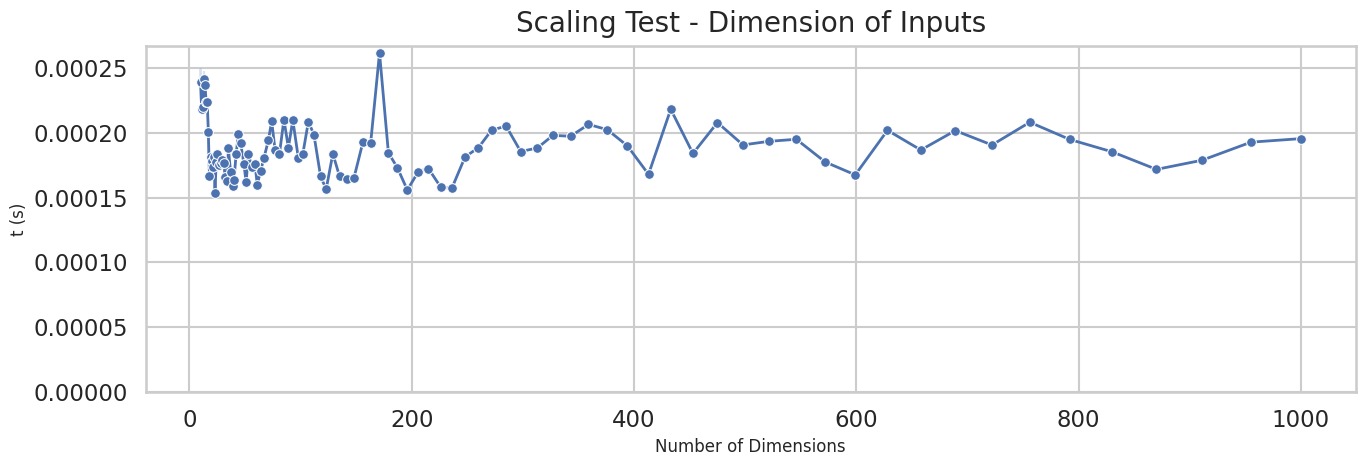

In [ ]:
sns.set_theme(style="whitegrid", context="talk")

y = np.array(times_array)

plt.figure(figsize=(14, 5))
sns.lineplot(
    x=n_dimensions,
    y=y,
    marker="o",
    linewidth=2,
    markersize=7
)
plt.ylim(bottom=0)
plt.title("Scaling Test - Dimension of Inputs", pad=10, fontsize=20)
plt.xlabel("Number of Dimensions", fontsize=12)
plt.ylabel(r"t (s)", fontsize=12)

plt.tight_layout()
plt.show()